Import/Install the necessary Libraries

In [ ]:
# Uncomment below line to install the necessary dependencies if required
# !pip install pandas numpy sklearn warnings matplotlib seaborn 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

Loading the Data

In [6]:
data = pd.read_csv('listings.csv')  # Replace with the dataset file path
warnings.filterwarnings("ignore")
data.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20240805060347,2024-08-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.27
1,5136,https://www.airbnb.com/rooms/5136,20240805060347,2024-08-05,city scrape,Spacious Family Friendly Duplex w/ Patio + Yard,"We welcome you to stay in our lovely 2 br, 130...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.75,4.75,NaN,t,1,1,0,0,0.03
2,6848,https://www.airbnb.com/rooms/6848,20240805060347,2024-08-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.68,4.57,NaN,f,1,1,0,0,1.04
3,6872,https://www.airbnb.com/rooms/6872,20240805060347,2024-08-05,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),A charming month-to-month home away from home ...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.04
4,6990,https://www.airbnb.com/rooms/6990,20240805060347,2024-08-05,city scrape,UES Beautiful Blue Room,Beautiful peaceful healthy home,"Location: Five minutes to Central Park, Museum...",https://a0.muscache.com/pictures/be6cd5b3-9295...,16800,...,4.95,4.85,4.84,NaN,f,1,0,1,0,1.37
5,7064,https://www.airbnb.com/rooms/7064,20240805060347,2024-08-05,previous scrape,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",https://a0.muscache.com/pictures/13708959/7e74...,17297,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.08
6,7097,https://www.airbnb.com/rooms/7097,20240805060347,2024-08-05,city scrape,"Perfect for Your Parents, With Garden & Patio",Parents/grandparents coming to town or are you...,"Residential, village-like atmosphere. Lots of ...",https://a0.muscache.com/pictures/aaac19fc-4b4d...,17571,...,4.93,4.94,4.82,OSE-STRREG-0000008,t,2,0,2,0,2.13
7,7801,https://www.airbnb.com/rooms/7801,20240805060347,2024-08-05,city scrape,Sunny Williamsburg Loft with Sauna,A huge loft in a repurposed factory building i...,We've lived here for over 15 years and love Wi...,https://a0.muscache.com/pictures/miso/Hosting-...,21207,...,4.75,5.00,4.88,NaN,f,1,1,0,0,0.07
8,64314,https://www.airbnb.com/rooms/64314,20240805060347,2024-08-05,city scrape,cozy bedroom in lovely garden apt,NaN,NaN,https://a0.muscache.com/pictures/e358aa98-86a1...,314256,...,4.76,4.41,4.80,NaN,t,1,0,1,0,0.28
9,8490,https://www.airbnb.com/rooms/8490,20240805060347,2024-08-05,city scrape,"Maison des Sirenes1,bohemian, luminous apartment",Soak up the modern and vintage charm<br />of t...,NaN,https://a0.muscache.com/pictures/1d0d9773-c829...,25183,...,4.88,4.67,4.76,NaN,f,2,2,0,0,1.04


Cleaning and Preprocessing the Data

In [14]:
# Cleaning the 'price' column to remove currency symbols and convert to numeric
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Regarding the 'Price' values, since its impossible to replace NaN values with any value without inducing a bias 
# we will drop all values with NaN values for Price
data_cleaned = data.dropna(subset=['price'])

# Verify that there are no missing values in the 'price' column
print("Missing values in 'price' after cleaning:", data_cleaned['price'].isnull().sum())
print("Shape of the dataset after dropping rows with NaN in 'price':", data_cleaned.shape)
data_cleaned['price'].head(10)

Missing values in 'price' after cleaning: 0
Shape of the dataset after dropping rows with NaN in 'price': (23471, 75)


0     240.0
1     215.0
2      81.0
3      65.0
4      65.0
6     205.0
7     325.0
8     100.0
9     170.0
10     65.0
Name: price, dtype: float64

In [6]:
# We drop list of irrelevant columns to improve model performance
columns_to_drop = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
    'description', 'neighborhood_overview', 'picture_url', 'host_id',
    'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
    'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
    'calendar_updated', 'calendar_last_scraped', 'first_review',
    'last_review', 'host_response_time', 'host_verifications', 'host_has_profile_pic',
    'host_identity_verified', 'neighbourhood',
    'neighbourhood_group_cleansed', 'latitude', 'longitude',
    'bathrooms_text', 'license',
    'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'
]

# Drop the columns from the dataset
data_cleaned = data_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Display the shape and remaining columns
print("Shape of the dataset after dropping irrelevant columns:", data_cleaned.shape)
print("Remaining Columns:")
print(data_cleaned.columns)

Shape of the dataset after dropping irrelevant columns: (23471, 39)
Remaining Columns:
Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'rev

In [8]:
# Identify categorical columns for encoding
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col].astype(str))

# Ensure all columns are numeric
print("Data types after encoding:")
print(data_cleaned.dtypes)

# Check for missing or infinite values and handle them
data_cleaned = data_cleaned.replace([np.inf, -np.inf], np.nan).fillna(data_cleaned.mean())

# Verify the dataset is clean
print("Remaining missing values:")
print(data_cleaned.isnull().sum().sum())

Data types after encoding:
host_response_rate               int64
host_acceptance_rate             int64
host_is_superhost                int64
host_listings_count            float64
host_total_listings_count      float64
neighbourhood_cleansed           int64
property_type                    int64
room_type                        int64
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
amenities                        int64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
minimum_minimum_nights         float64
maximum_minimum_nights         float64
minimum_maximum_nights         float64
maximum_maximum_nights         float64
minimum_nights_avg_ntm         float64
maximum_nights_avg_ntm         float64
has_availability                 int64
availability_30                  int64
availability_60                  int6

# Data Visualizations on 'Price' of Rental Properties with respect to various features

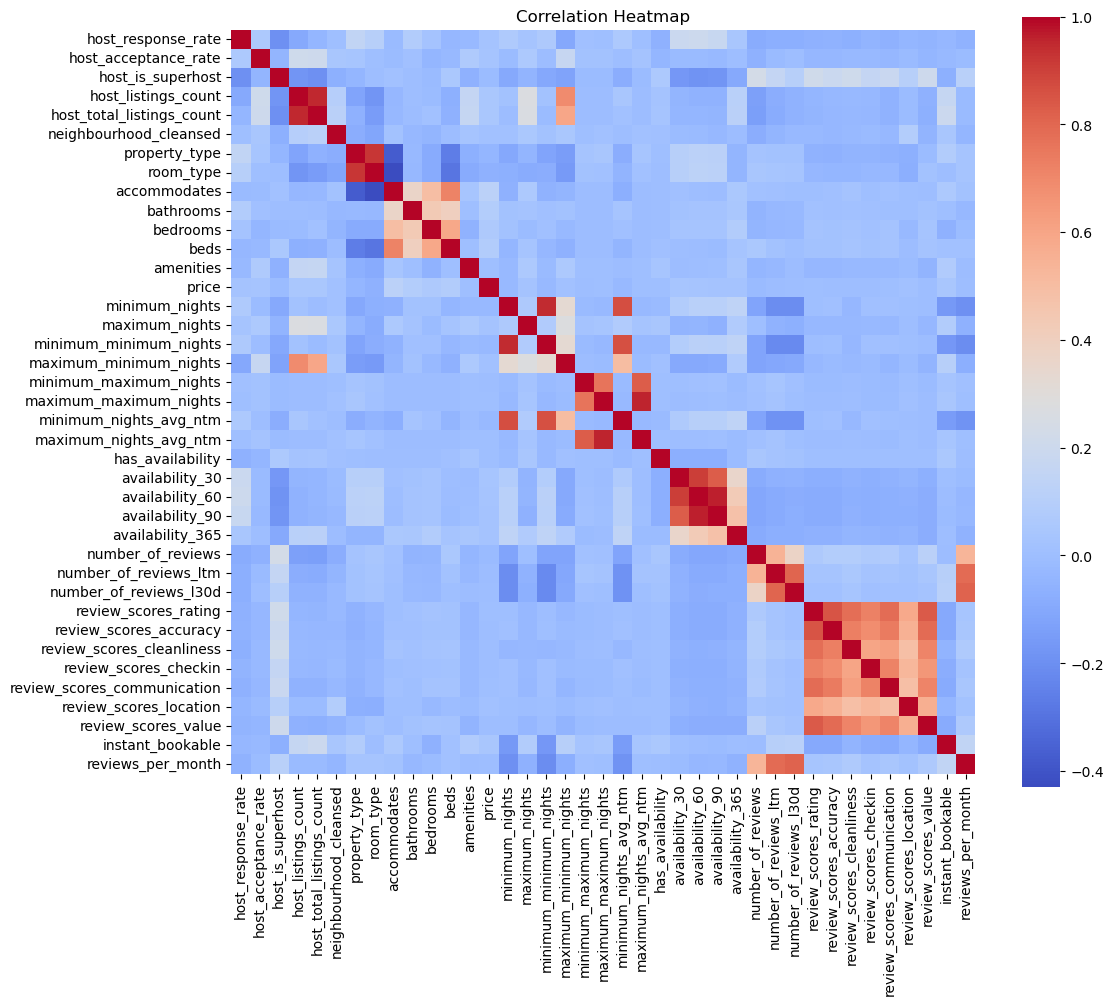


Top 3 features positively correlated with 'price':
accommodates    0.120159
bathrooms       0.086652
beds            0.082711
Name: price, dtype: float64

Top 3 features negatively correlated with 'price':
minimum_nights   -0.023620
property_type    -0.042157
room_type        -0.063601
Name: price, dtype: float64


In [9]:
# Correlation Analysis
correlation_matrix = data_cleaned.corr()

# Heatmap for Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Top Features Correlated with 'price'
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

print("\nTop 3 features positively correlated with 'price':")
print(correlation_with_price[1:4])

print("\nTop 3 features negatively correlated with 'price':")
print(correlation_with_price[-3:])

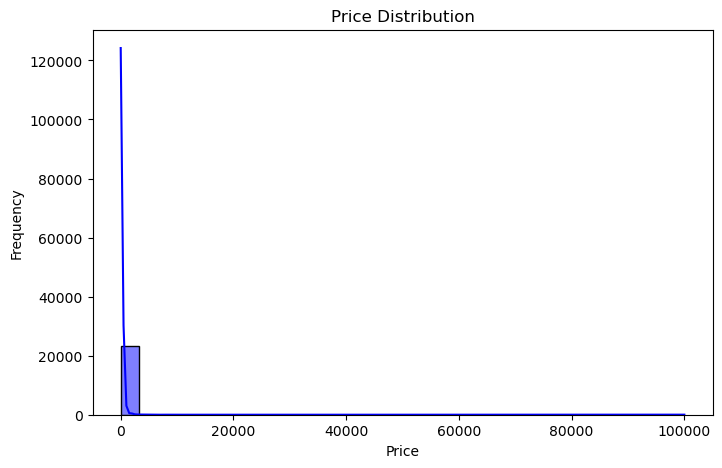

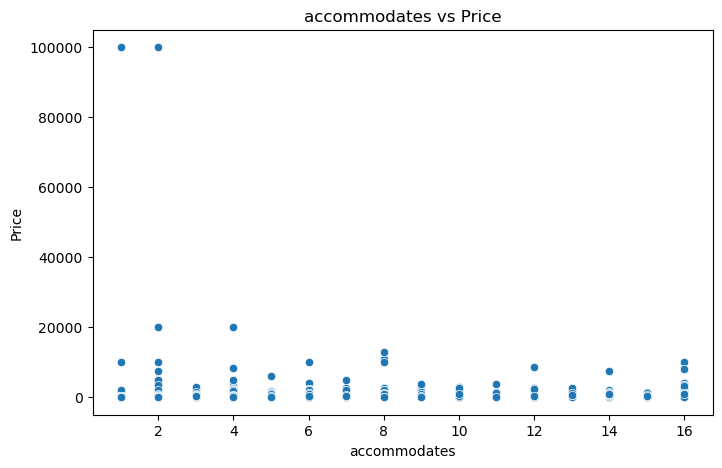

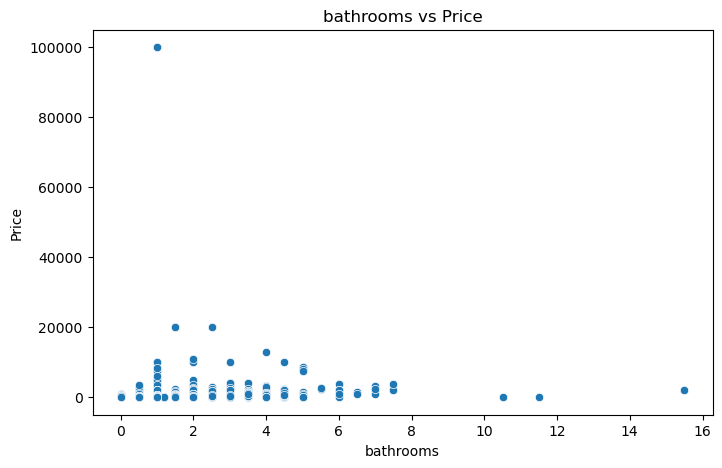

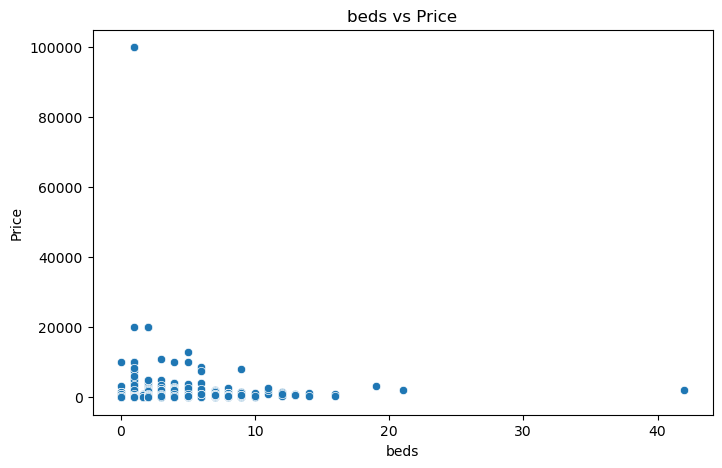

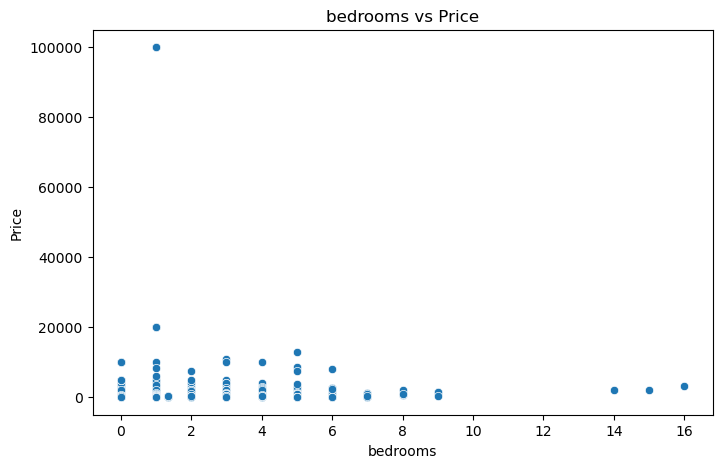

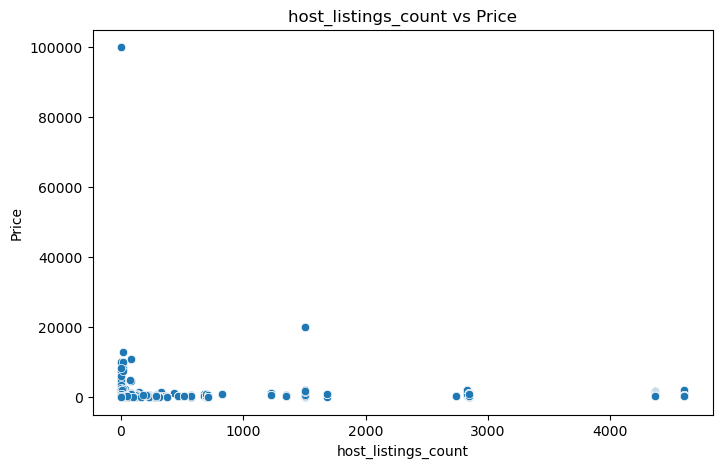

In [11]:
# Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['price'], bins=30, kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Scatter Plots for Highly Correlated Features
top_positive_features = correlation_with_price[1:6].index  # Exclude 'price' itself

for feature in top_positive_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data_cleaned[feature], y=data_cleaned['price'])
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

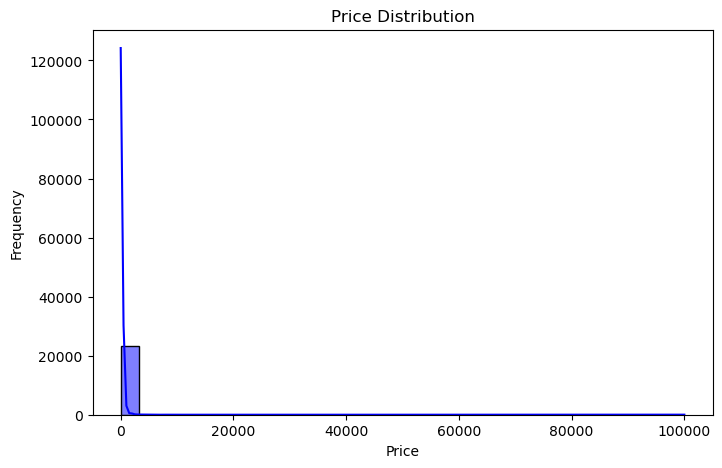

In [12]:
# Distribution of price
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['price'], bins=30, kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

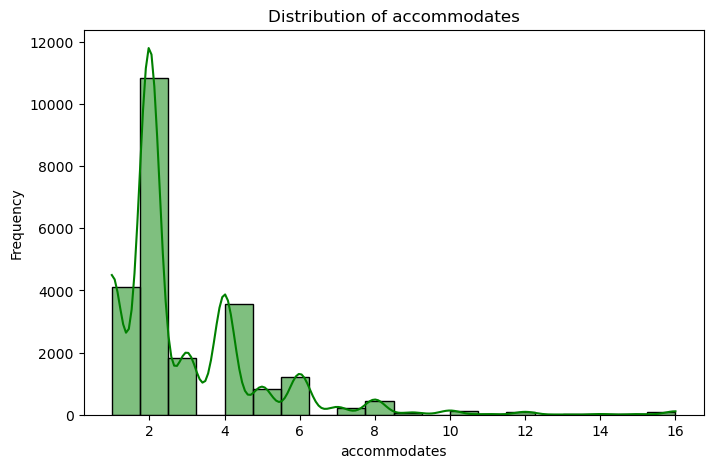

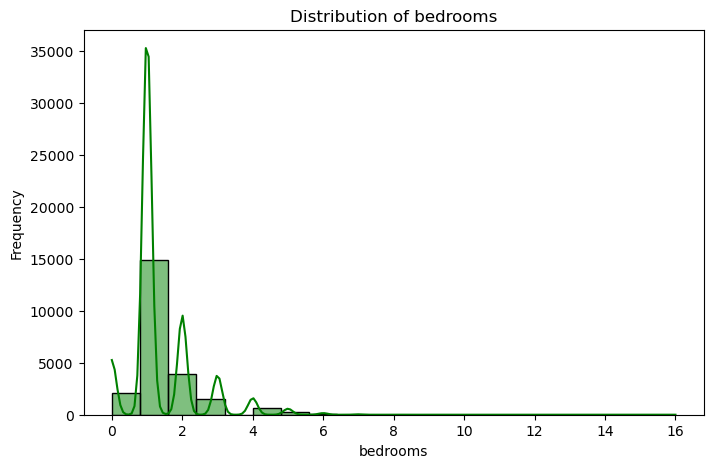

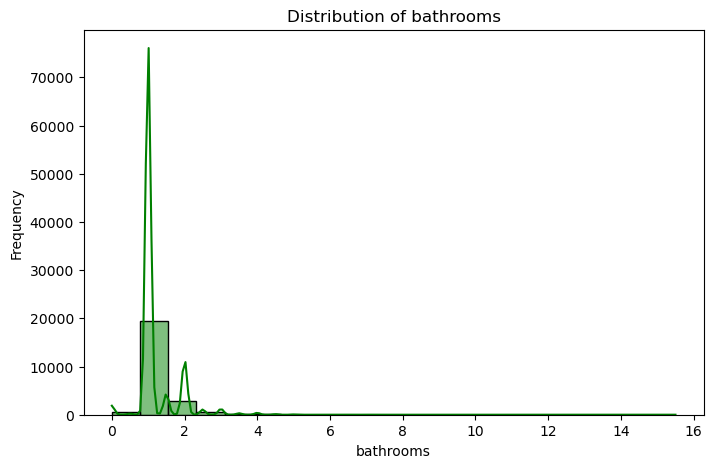

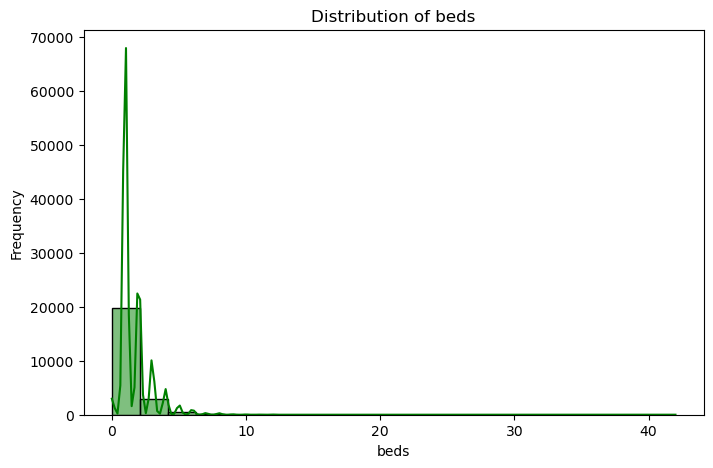

In [19]:
# Feature distribution for key numerical features
features_to_plot = ['accommodates', 'bedrooms', 'bathrooms', 'beds']

for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_cleaned[feature], bins=20, kde=True, color='green')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


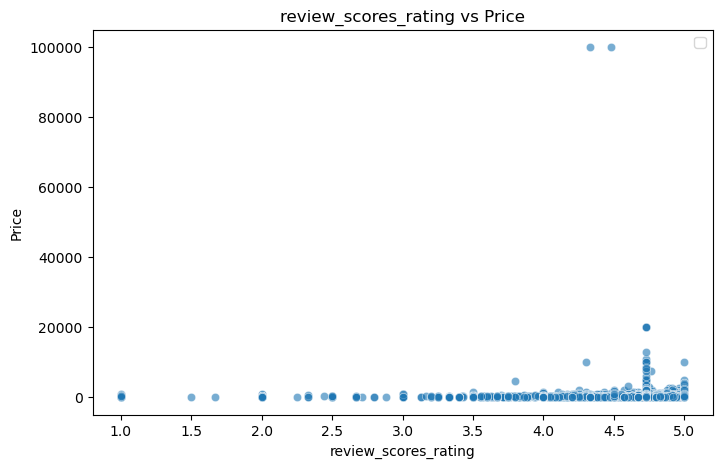

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


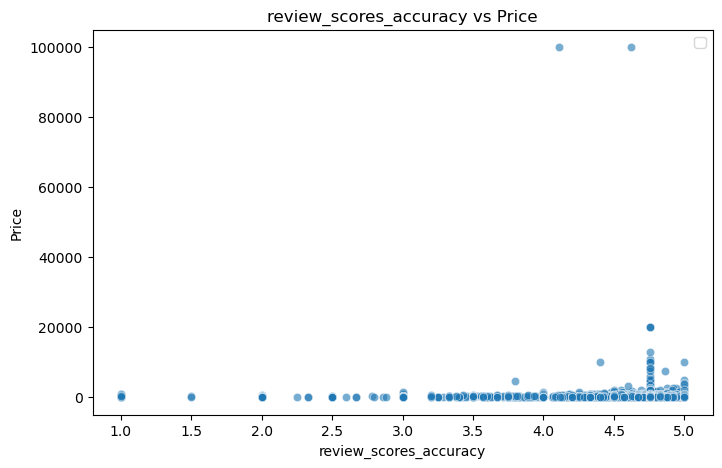

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


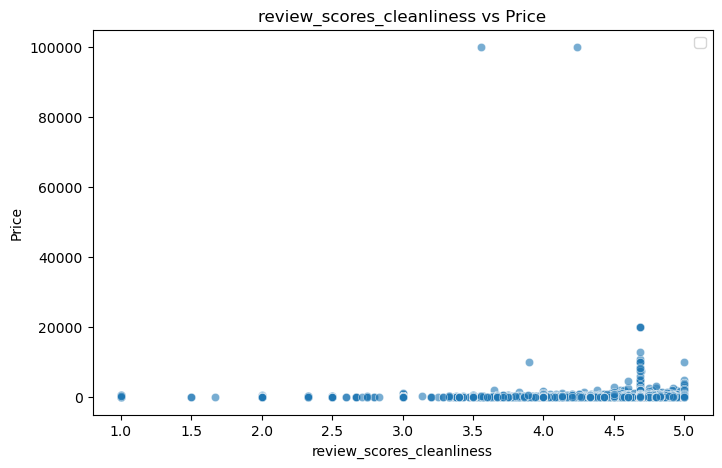

In [23]:
# Scatterplot for review scores vs price
review_features = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness']

for feature in review_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data_cleaned[feature], y=data_cleaned['price'], alpha=0.6)
    plt.title(f"{feature} vs Price")
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()
    

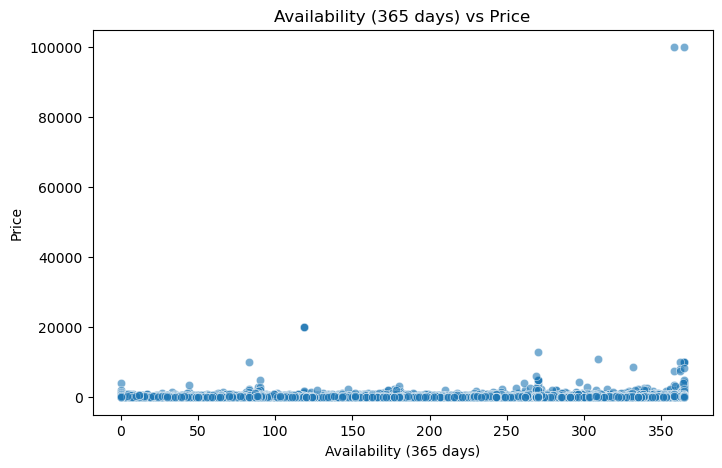

In [24]:
# Scatterplot for availability vs price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_cleaned['availability_365'], y=data_cleaned['price'], alpha=0.6)
plt.title("Availability (365 days) vs Price")
plt.xlabel("Availability (365 days)")
plt.ylabel("Price")
plt.show()

In [30]:
# Encode categorical columns to numerical
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_columns:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col].astype(str))

# Define features and target variable
X = data_cleaned.drop(columns=['price'])  # Features
y = data_cleaned['price']  # Target

# Train a Random Forest model to compute feature importance
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X, y)

# Calculate feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance Analysis:")
feature_importance

Feature Importance Analysis:


,Feature,Importance
31,review_scores_cleanliness,0.508814
12,amenities,0.047562
5,neighbourhood_cleansed,0.033703
3,host_listings_count,0.031307
9,bathrooms,0.030773
0,host_response_rate,0.029795
27,number_of_reviews_ltm,0.027760
35,review_scores_value,0.027614
25,availability_365,0.025597
8,accommodates,0.025134


In [ ]:
# Price Prediction Model using DecisionTreeRegresso

# We filter feature columns based on results of above model to get better accuracy at predicting prices based on features with highest Importance


In [17]:
filtered_features = [
    'review_scores_cleanliness',
    'amenities',
    'neighbourhood_cleansed',
    'host_listings_count',
    'bathrooms',
    'host_response_rate',
    'number_of_reviews_ltm',
    'review_scores_value',
    'availability_365',
    'accommodates',
    'host_acceptance_rate',
    'host_total_listings_count',
    'maximum_nights',
    'property_type',
    'price'
]

df = data[filtered_features]

df.dropna(subset=['price'], inplace=True)
# Display features with NaN values
# Check for NaN values in the selected features
nan_counts = df[filtered_features].isnull().sum()
nan_features = nan_counts[nan_counts > 0]
print("Features with NaN values:")
print(nan_features)

Features with NaN values:
review_scores_cleanliness    7025
bathrooms                       6
host_response_rate           3307
review_scores_value          7025
host_acceptance_rate         2476
dtype: int64


# Preprocessing Data for DecisionTreeRegressor for Predicting Prices

In [74]:
# Convert 'host_response_rate' from percentage string to numeric
df['host_acceptance_rate'] = (
    df['host_acceptance_rate']
    .str.replace('%', '')  # Remove percentage sign
    .astype(float)         # Convert to float
    / 100                  # Convert percentage to decimal
)


In [76]:
# Convert 'host_response_rate' from percentage string to numeric
df['host_response_rate'] = (
    df['host_response_rate']
    .str.replace('%', '')  # Remove percentage sign
    .astype(float)         # Convert to float
    / 100                  # Convert percentage to decimal
)


In [78]:
df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].median(), inplace=True)
df['review_scores_value'].fillna(df['review_scores_value'].median(), inplace=True)
df['bathrooms'] = df.groupby('neighbourhood_cleansed')['bathrooms'].transform(lambda x: x.fillna(x.median()))
df['host_acceptance_rate'].fillna(0, inplace=True)
df['host_response_rate'].fillna(0, inplace=True)

In [80]:
# Check for NaN values in the selected features
nan_counts = df.isnull().sum()
nan_features = nan_counts[nan_counts > 0]
print("Features with NaN values:")
print(nan_features)

Features with NaN values:
Series([], dtype: int64)


In [19]:
# We consider amenities count to be a better replacement for conveying importance than Label-Encoding it 
df['amenities_count'] = df['amenities'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
df.drop(columns=['amenities'], inplace=True)  # Drop the original column if not needed

In [84]:
selected_features = [
    'review_scores_cleanliness',
    'amenities_count',
    'neighbourhood_cleansed',
    'host_listings_count',
    'bathrooms',
    'host_response_rate',
    'accommodates',
    'host_acceptance_rate'
]
target = 'price'

# Encode categorical columns to numerical
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Split the data into training and testing sets
X = df[selected_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R2 Score: 0.742947890936718
Mean Absolute Error (MAE): 110.82904249142419
Root Mean Squared Error (RMSE): 344.7090211019369


# Visualization of Feature Importance for Price Prediction

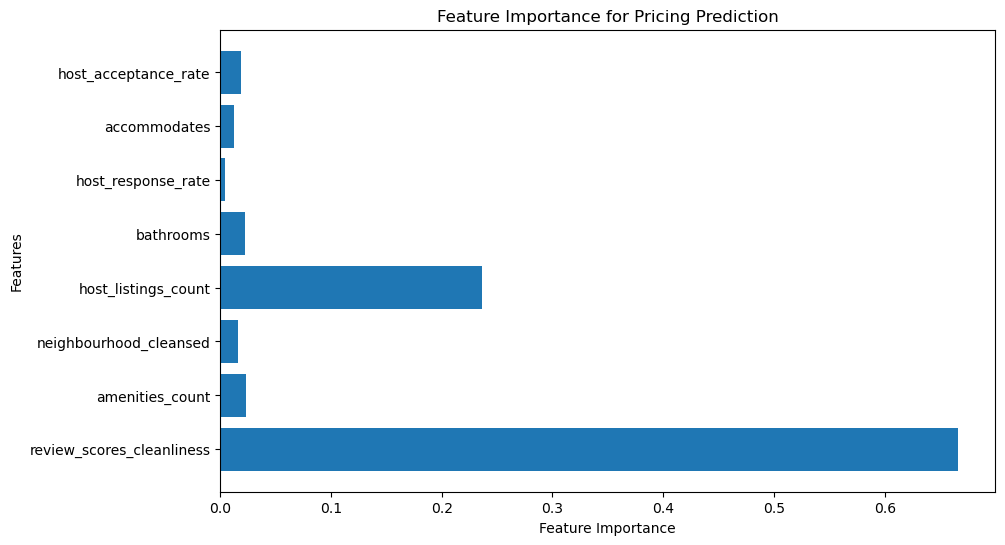

In [86]:
importance = model.feature_importances_

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(selected_features, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Pricing Prediction')
plt.show()

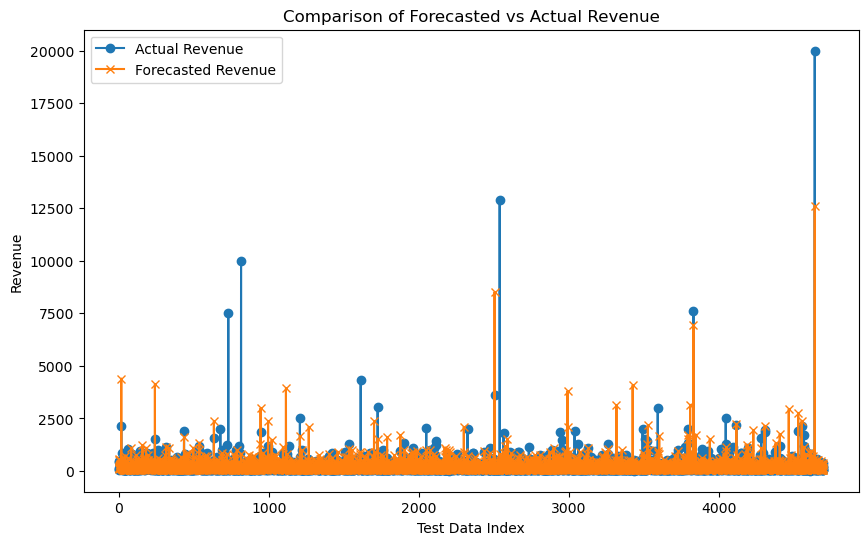

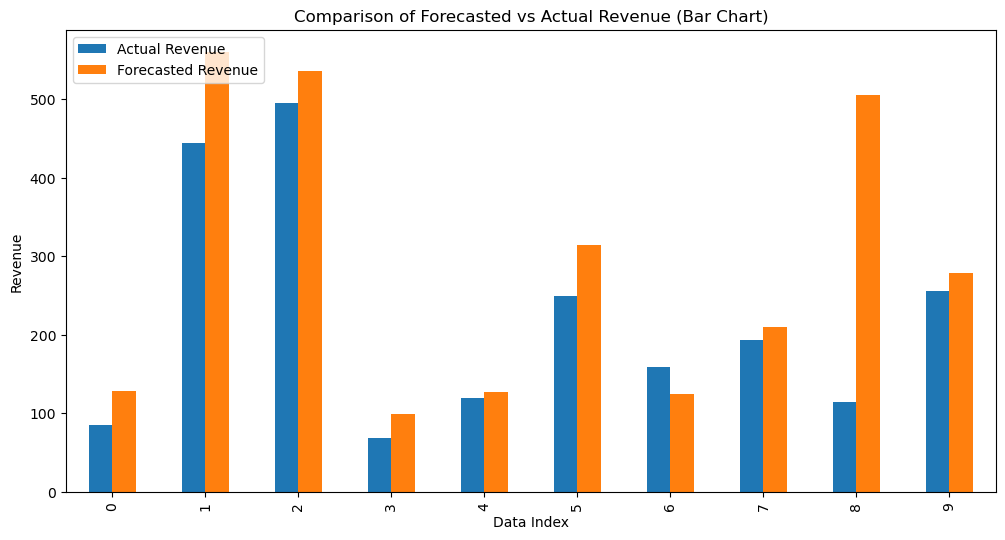

In [50]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Revenue': y_test,
    'Forecasted Revenue': y_pred
})

comparison_df.reset_index(drop=True, inplace=True)

# Plot the comparison as a line chart
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Actual Revenue'], label='Actual Revenue', marker='o')
plt.plot(comparison_df.index, comparison_df['Forecasted Revenue'], label='Forecasted Revenue', marker='x')
plt.xlabel('Test Data Index')
plt.ylabel('Revenue')
plt.title('Comparison of Forecasted vs Actual Revenue')
plt.legend()
plt.show()

#Plot as a bar chart
comparison_df.head(10).plot(kind='bar', figsize=(12, 6))
plt.xlabel('Data Index')
plt.ylabel('Revenue')
plt.title('Comparison of Forecasted vs Actual Revenue (Bar Chart)')
plt.legend(loc='upper left')
plt.show()

Mean Squared Error (MSE): 6656.74
Root Mean Squared Error (RMSE): 81.59
Mean Absolute Error (MAE): 61.83
R² Score: 0.39


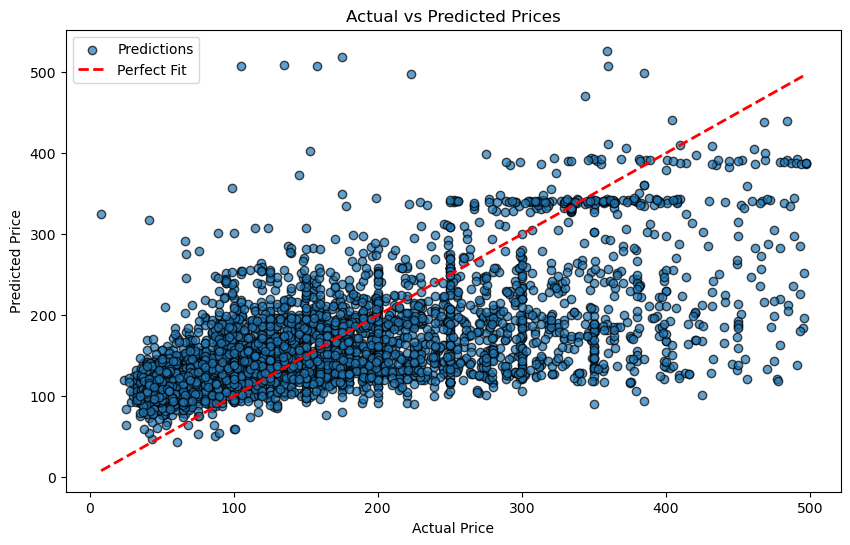

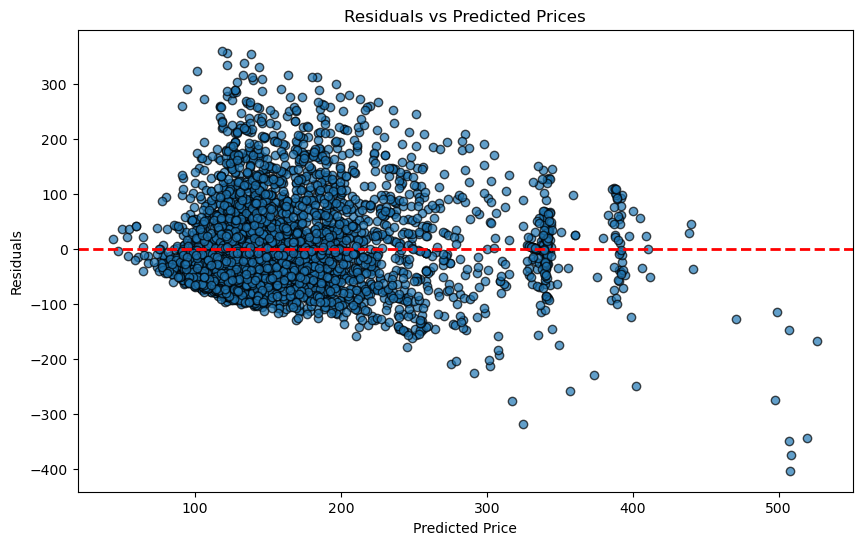

In [60]:
# Define selected features and target
selected_features = [
    'review_scores_cleanliness',
    'amenities_count',
    'neighbourhood_cleansed',
    'host_listings_count',
    'bathrooms',
    'host_response_rate',
    'accommodates',
    'host_acceptance_rate'
]
target = 'price'

# Encode categorical columns to numerical
categorical_columns = ['neighbourhood_cleansed']
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Remove outliers in the target variable using the IQR method
q1 = df[target].quantile(0.25)
q3 = df[target].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df[target] >= lower_bound) & (df[target] <= upper_bound)]

# Split features and target
X = df[selected_features]
y = df[target]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Visualize Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

## Populating the revenue forecasts table

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import mysql.connector

def fetch_data():
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="$asukeUch1ha",
        database="vacation_rentals"
    )
    query = """
        SELECT p.property_id, p.room_type, p.location, p.listing_price, p.occupancy_rate, 
               COUNT(b.booking_id) AS total_bookings, 
               SUM(b.nights_booked) AS total_nights_booked, 
               SUM(b.total_price) AS total_revenue
        FROM properties p
        LEFT JOIN bookings b ON p.property_id = b.property_id
        GROUP BY p.property_id, p.room_type, p.location, p.listing_price, p.occupancy_rate
    """
    data = pd.read_sql(query, conn)
    conn.close()
    return data

# Step 2: Preprocessing
def preprocess_data(data):
    data = pd.get_dummies(data, columns=["room_type", "location"], drop_first=True)
    data.fillna(0, inplace=True)  # Replace missing values with 0
    return data

# Step 3: Train Random Forest Model
def train_random_forest(data):
    # Features and target variable
    X = data.drop(columns=["property_id", "total_revenue"])
    y = data["total_revenue"]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and Train Model
    model = RandomForestRegressor(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)

    # Evaluate Model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return model, X

# Step 4: Generate Revenue Forecasts
def generate_forecasts(model, data):
    # Use model to predict revenue for all properties
    data["forecasted_revenue"] = model.predict(data.drop(columns=["property_id", "total_revenue"]))
    
    # Add confidence intervals (assuming ±10% as an example)
    data["confidence_interval_lower"] = data["forecasted_revenue"] * 0.9
    data["confidence_interval_upper"] = data["forecasted_revenue"] * 1.1
    
    return data

# Step 5: Insert Forecasts into Revenue_Forecasts Table
def populate_revenue_forecasts(forecasts):
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="$asukeUch1ha",
        database="vacation_rentals"
    )
    cursor = conn.cursor()

    # Insert forecast data into the Revenue_Forecasts table
    for _, row in forecasts.iterrows():
        query = """
            INSERT INTO Revenue_Forecasts (property_id, forecast_date, forecast_period, 
                                           forecast_start_date, forecast_end_date, 
                                           forecasted_revenue, confidence_interval_lower, 
                                           confidence_interval_upper)
            VALUES (%s, CURDATE(), %s, %s, %s, %s, %s, %s)
        """
        forecast_period = "Monthly" #Forecast period
        forecast_start_date = "2024-12-01"
        forecast_end_date = "2024-12-31"

        cursor.execute(query, (row["property_id"], forecast_period, forecast_start_date,
                               forecast_end_date, row["forecasted_revenue"],
                               row["confidence_interval_lower"], row["confidence_interval_upper"]))
    conn.commit()
    conn.close()
    print("Revenue forecasts populated successfully.")

# Main Execution
if __name__ == "__main__":
    data = fetch_data()
    processed_data = preprocess_data(data)
    model, features = train_random_forest(processed_data)
    forecasts = generate_forecasts(model, processed_data)
    populate_revenue_forecasts(forecasts)

Revenue forecasts populated successfully.
